<a href="https://colab.research.google.com/github/Maher1410/Q-Learning-in-a-Hybrid-Approach/blob/main/Implementing_Q_Learning_in_a_Hybrid_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode 0: Total reward: -137
Episode 100: Total reward: 92
Converged after 188 episodes.


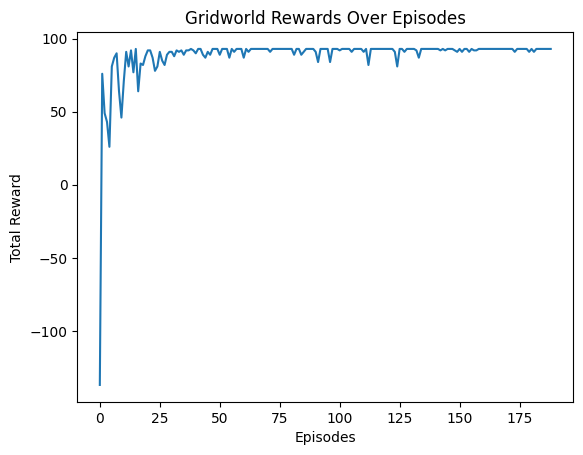

Optimal Policy (Action for each state):
r r d r d
r r r r d
d d X r d
r d d X d
r r r r G

A A A . .
. . A A A
. . X . A
. . . X A
. . . . G



In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ------------------------- Gridworld Environment -------------------------

class Gridworld:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4), obstacles=None):
        self.grid_size = grid_size
        self.start_state = start
        self.goal_state = goal
        self.obstacles = obstacles if obstacles else [(2, 2), (3, 3)]  # Default obstacles
        self.state = self.start_state
        self.action_space = ['up', 'down', 'left', 'right']  # Possible actions
        self.reward_map = self.initialize_rewards()  # Initialize rewards

    def initialize_rewards(self):
        # Initialize rewards grid
        rewards = np.full((self.grid_size, self.grid_size), -1)  # Default reward for each step
        rewards[self.goal_state] = 100  # Reward for reaching the goal
        for obstacle in self.obstacles:
            rewards[obstacle] = -10  # Penalty for obstacles
        return rewards

    def reset(self):
        """Reset the environment to the start state"""
        self.state = self.start_state
        return self.state

    def step(self, action):
        """Take a step in the environment and return new state, reward, and done flag"""
        row, col = self.state
        if action == 'up': row -= 1
        elif action == 'down': row += 1
        elif action == 'left': col -= 1
        elif action == 'right': col += 1

        # Keep the agent within grid boundaries
        row = max(0, min(self.grid_size - 1, row))
        col = max(0, min(self.grid_size - 1, col))

        next_state = (row, col)
        reward = self.reward_map[row, col]
        done = (next_state == self.goal_state)

        self.state = next_state
        return next_state, reward, done

    def render(self, policy=None, path=None):
        """Render the grid and show the agent's path or learned policy"""
        grid = np.full((self.grid_size, self.grid_size), '.')  # Empty grid
        grid[self.goal_state] = 'G'  # Goal state represented by 'G'
        for obstacle in self.obstacles:
            grid[obstacle] = 'X'  # Obstacles represented by 'X'

        # Fill grid with agent's path (if any)
        if path:
            for (r, c) in path:
                grid[r, c] = 'A'  # Agent's path represented by 'A'

        # Display the learned policy (if provided)
        if policy:
            for r in range(self.grid_size):
                for c in range(self.grid_size):
                    if grid[r, c] == '.':  # If not goal or obstacle
                        grid[r, c] = policy[(r, c)]

        # Print the grid
        print('\n'.join([' '.join(row) for row in grid]))
        print()


# ------------------------- Q-Learning Algorithm -------------------------

def q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1, convergence_threshold=0.01, learning_decay=0.995):
    """Q-learning algorithm to train the agent in the Gridworld environment"""
    # Initialize Q-table with zeros
    q_table = np.zeros((env.grid_size, env.grid_size, len(env.action_space)))
    rewards = []  # Track rewards over episodes
    path_list = []  # Store the agent's path for visualization
    previous_q_table = np.copy(q_table)

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        path = []

        while not done:
            row, col = state
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.action_space)  # Exploration
            else:
                action = env.action_space[np.argmax(q_table[row, col])]  # Exploitation

            # Take the step and get the new state, reward, and done flag
            next_state, reward, done = env.step(action)
            total_reward += reward
            path.append(state)

            # Update Q-value using the Bellman equation
            next_row, next_col = next_state
            action_idx = env.action_space.index(action)
            q_table[row, col, action_idx] = (1 - alpha) * q_table[row, col, action_idx] + \
                                             alpha * (reward + gamma * np.max(q_table[next_row, next_col]))

            state = next_state

        rewards.append(total_reward)
        path_list.append(path)

        # Check for convergence of the Q-table (early stopping)
        if np.max(np.abs(q_table - previous_q_table)) < convergence_threshold:
            print(f"Converged after {episode} episodes.")
            break
        previous_q_table = np.copy(q_table)

        # Decay epsilon for exploration-exploitation balance
        epsilon = max(epsilon * learning_decay, 0.01)

        # Show progress every 100 episodes (optional)
        if episode % 100 == 0:
            print(f"Episode {episode}: Total reward: {total_reward}")

    # Extract the optimal policy from the Q-table
    optimal_policy = {}
    for r in range(env.grid_size):
        for c in range(env.grid_size):
            optimal_action = np.argmax(q_table[r, c])
            optimal_policy[(r, c)] = env.action_space[optimal_action]

    return q_table, rewards, path_list, optimal_policy


# ------------------------- Training the Custom Gridworld -------------------------

def plot_rewards(rewards, title):
    """Plot the rewards over episodes"""
    plt.plot(rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title(title)
    plt.show()


# Initialize the environment and train the agent
gridworld_env = Gridworld(grid_size=5, start=(0, 0), goal=(4, 4), obstacles=[(2, 2), (3, 3)])

# Train the agent using Q-learning
q_table_gridworld, rewards_gridworld, path_list, optimal_policy = q_learning(
    gridworld_env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1, convergence_threshold=0.01, learning_decay=0.995
)

# Visualize rewards over episodes
plot_rewards(rewards_gridworld, 'Gridworld Rewards Over Episodes')

# Visualize the learned policy
print("Optimal Policy (Action for each state):")
gridworld_env.render(policy=optimal_policy)

# Visualize the final learned path (example for the last episode)
gridworld_env.render(path=path_list[-1])


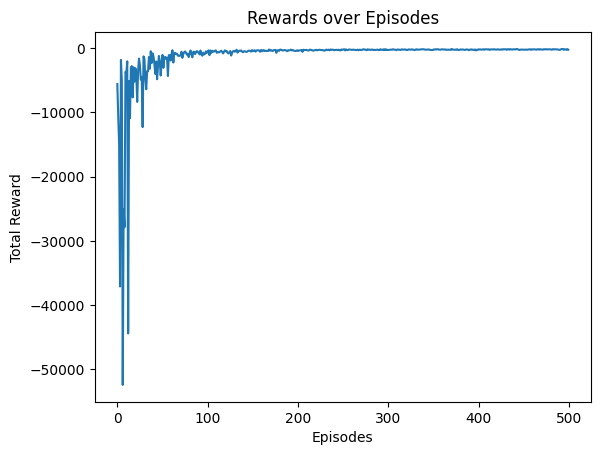

Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4
Final test reward: -204.0
Video recorded in: ./video


In [18]:
import gym
from gym.wrappers.record_video import RecordVideo
import numpy as np
import os
import matplotlib.pyplot as plt

video_path = "./video"
os.makedirs(video_path, exist_ok=True)

env = gym.make('MountainCar-v0', render_mode='rgb_array')

def discretize_state(state, state_bins, state_bounds):
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0])
              for i in range(len(state))]
    new_state = [int(np.round((bins - 1) * ratio)) for ratio, bins in zip(ratios, state_bins)]
    new_state = [min(bins - 1, max(0, s)) for s, bins in zip(new_state, state_bins)]
    return tuple(new_state)

def choose_action(state, epsilon, q_table, action_space):
    if np.random.random() < epsilon:
        return np.random.randint(0, action_space)
    return np.argmax(q_table[state])

def train_mountain_car(env, q_table, state_bins, state_bounds, episodes=500, alpha=0.1, gamma=0.995, epsilon=1.0, epsilon_decay=0.998):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
        discretized_state = discretize_state(state, [state_bins]*len(state), state_bounds)
        total_reward = 0
        done = False
        while not done:
            action = choose_action(discretized_state, epsilon, q_table, env.action_space.n)
            result = env.step(action)
            if len(result) == 4:
                next_state, reward, done, _ = result
            elif len(result) == 5:
                next_state, reward, done, _, _ = result

            reward += abs(next_state[0] - (-0.5))
            discretized_next_state = discretize_state(next_state, [state_bins]*len(next_state), state_bounds)

            q_table[discretized_state+(action,)] = (1 - alpha)*q_table[discretized_state+(action,)] + \
                                                    alpha*(reward + gamma*np.max(q_table[discretized_next_state]))

            discretized_state = discretized_next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon = max(epsilon * epsilon_decay, 0.01)
    return q_table, rewards

def test_agent(env, q_table, state_bins, state_bounds):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    total_reward = 0
    done = False
    while not done:
        discretized_state = discretize_state(state, [state_bins]*len(state), state_bounds)
        action = np.argmax(q_table[discretized_state])
        result = env.step(action)
        if len(result) == 4:
            state, reward, done, _ = result
        elif len(result) == 5:
            state, reward, done, _, _ = result
        total_reward += reward
    return total_reward

state_bins = 40
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_space = len(env.observation_space.low)
q_table = np.zeros([state_bins]*state_space+[env.action_space.n])

q_table, rewards = train_mountain_car(env, q_table, state_bins, state_bounds, episodes=500)

plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()

# Create a new environment with video recording for the final test
test_env = gym.make('MountainCar-v0', render_mode='rgb_array')  # Removed new_step_api
test_env = RecordVideo(test_env, video_path, episode_trigger=lambda episode_id: True)
final_reward = test_agent(test_env, q_table, state_bins, state_bounds)
print("Final test reward:", final_reward)
test_env.close()
print("Video recorded in:", video_path)


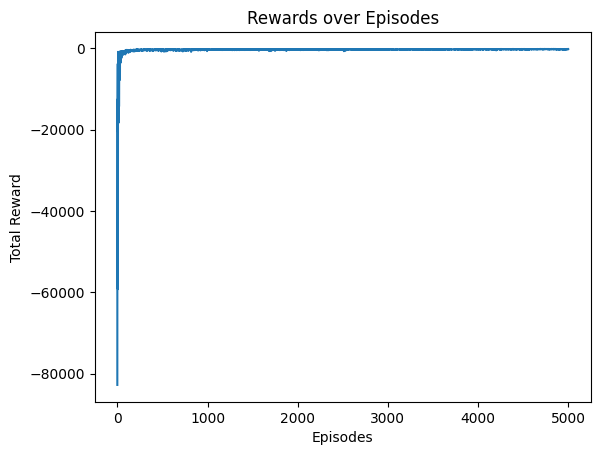

Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4
Final test reward: -129.0
Video recorded in: ./video


In [19]:
import gym
from gym.wrappers.record_video import RecordVideo
import numpy as np
import os
import matplotlib.pyplot as plt

video_path = "./video"
os.makedirs(video_path, exist_ok=True)

env = gym.make('MountainCar-v0', render_mode='rgb_array')

def discretize_state(state, state_bins, state_bounds):
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_state = [int(np.round((bins - 1)*ratio)) for ratio, bins in zip(ratios, state_bins)]
    new_state = [min(bins - 1, max(0, s)) for s, bins in zip(new_state, state_bins)]
    return tuple(new_state)

def choose_action(state, epsilon, q_table, action_space):
    if np.random.random() < epsilon:
        return np.random.randint(0, action_space)
    return np.argmax(q_table[state])

def train_mountain_car(env, q_table, state_bins, state_bounds, episodes=5000, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
        discretized_state = discretize_state(state, [state_bins]*len(state), state_bounds)
        total_reward = 0
        done = False
        while not done:
            action = choose_action(discretized_state, epsilon, q_table, env.action_space.n)
            result = env.step(action)
            if len(result) == 4:
                next_state, reward, done, _ = result
            elif len(result) == 5:
                next_state, reward, done, _, _ = result

            next_discretized_state = discretize_state(next_state, [state_bins]*len(next_state), state_bounds)
            q_table[discretized_state+(action,)] = (1 - alpha)*q_table[discretized_state+(action,)] + \
                                                    alpha*(reward + gamma*np.max(q_table[next_discretized_state]))

            discretized_state = next_discretized_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon = max(epsilon*epsilon_decay, 0.01)
    return q_table, rewards

def test_agent(env, q_table, state_bins, state_bounds):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    total_reward = 0
    done = False
    while not done:
        discretized_state = discretize_state(state, [state_bins]*len(state), state_bounds)
        action = np.argmax(q_table[discretized_state])
        result = env.step(action)
        if len(result) == 4:
            state, reward, done, _ = result
        elif len(result) == 5:
            state, reward, done, _, _ = result
        total_reward += reward
    return total_reward

state_bins = 40
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_space = len(env.observation_space.low)
q_table = np.zeros([state_bins]*state_space+[env.action_space.n])

q_table, rewards = train_mountain_car(env, q_table, state_bins, state_bounds)

plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()

test_env = gym.make('MountainCar-v0', render_mode='rgb_array')
test_env = RecordVideo(test_env, video_path, episode_trigger=lambda episode_id: True)
final_reward = test_agent(test_env, q_table, state_bins, state_bounds)
print("Final test reward:", final_reward)
test_env.close()

print("Video recorded in:", video_path)


In [13]:
pip install gym==0.26.2


Episode 0, Reward: -4441.753324121004
Episode 100, Reward: -414.8136620107107
Episode 200, Reward: -432.5877233146457
Episode 300, Reward: -366.71075213269796
Episode 400, Reward: -172.08909642184153


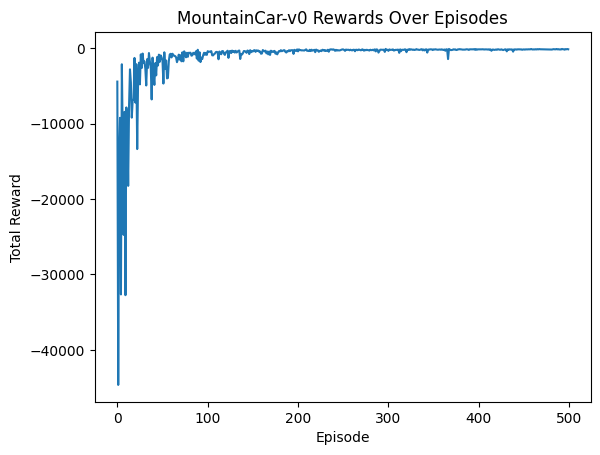

In [16]:
import gym
from gym.wrappers import RecordVideo
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------- MountainCar-v0 Environment with Video -------------------------

def discretize_state(state, state_bins, state_bounds):
    """Convert continuous states into discrete bins"""
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0])
              for i in range(len(state))]
    new_state = [int(np.round((bins - 1) * ratio)) for ratio, bins in zip(ratios, state_bins)]
    new_state = [min(bins - 1, max(0, s)) for s, bins in zip(new_state, state_bins)]
    return tuple(new_state)

def choose_action(state, epsilon, q_table, action_space):
    """Epsilon-greedy policy for selecting an action"""
    if np.random.random() < epsilon:
        return np.random.randint(0, action_space)
    return np.argmax(q_table[state])

def train_mountain_car(env, q_table, state_bins, state_bounds, episodes=500, alpha=0.1, gamma=0.995, epsilon=1.0, epsilon_decay=0.998):
    """Q-learning algorithm for MountainCar-v0 environment"""
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]  # Handles version-specific reset output
        discretized_state = discretize_state(state, [state_bins] * len(state), state_bounds)
        total_reward = 0
        done = False

        while not done:
            action = choose_action(discretized_state, epsilon, q_table, env.action_space.n)

            # Correct step to handle 5 return values
            next_state, reward, done, truncated, _ = env.step(action)

            reward += abs(next_state[0] - (-0.5))  # Reward shaping
            discretized_next_state = discretize_state(next_state, [state_bins] * len(next_state), state_bounds)

            # Update Q-value
            q_table[discretized_state + (action,)] = (1 - alpha) * q_table[discretized_state + (action,)] + \
                                                     alpha * (reward + gamma * np.max(q_table[discretized_next_state]))

            total_reward += reward
            discretized_state = discretized_next_state

        rewards.append(total_reward)
        epsilon = max(epsilon * epsilon_decay, 0.01)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}")

    return q_table, rewards

def plot_rewards(rewards, title):
    plt.plot(rewards)
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

# ------------------------- Run Environment and Record Video -------------------------

# Initialize environment
env = gym.make('MountainCar-v0')

# Ensure the directory exists
video_dir = './mountain_car_videos'
os.makedirs(video_dir, exist_ok=True)

# Wrap the environment with RecordVideo to save the video
env = RecordVideo(env, video_dir, episode_trigger=lambda episode_id: episode_id % 50 == 0)  # Record every 50th episode

state_bins = 20
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Initialize Q-table
q_table = np.zeros([state_bins] * len(env.observation_space.low) + [env.action_space.n])

# Train the agent
q_table, rewards = train_mountain_car(env, q_table, state_bins, state_bounds, episodes=500)

# Visualize rewards
plot_rewards(rewards, 'MountainCar-v0 Rewards Over Episodes')

# Close environment to flush and save the video files
env.close()
